# 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', 500)

# 시계열 데이터 생성
np.random.seed(42)
dataes = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dataes, 
    'Value' : values
})

### 이동 평균과 이동 표준편차 계산 

In [3]:
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()

print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.520013
7      0.558687
8      0.511372
9      0.496353
10     0.212575
11     0.179493
12     0.247507
13    -0.251421
14    -0.607471
15    -0.620730
16    -0.842929
17    -0.731834
18    -0.795019
19    -1.031342
20    -0.548638
21    -0.334475
22    -0.244502
23    -0.303347
24    -0.426008
25    -0.280444
26    -0.243114
27    -0.398822
28    -0.452373
29    -0.503691
30    -0.386114
31    -0.043733
32    -0.061508
33    -0.048182
34     0.015654
35    -0.072947
36    -0.001439
37    -0.195434
38    -0.649786
39    -0.619734
40    -0.363138
41    -0.456163
42    -0.298278
43    -0.371130
44    -0.302395
45    -0.215489
46    -0.309417
47    -0.263895
48    -0.239288
49    -0.474630
50    -0.385317
51    -0.229112
52    -0.222980
53    -0.069792
54    -0.073524
55     0.010428
56     0.142403
57     0.051932
58     0.154267
59     0.390334
60     0.234498
61     0.060689
62    -0

#### 임계값 설정, 이상치 탐지 

In [5]:
threshold_multiplier = 2 # 임계값 계수 
data['Threshold'] = data['MovingAverage'] + threshold_multiplier * data['MovingStd']

print(data['Threshold'])

# 이상치 탐지 -> 임계값을 초과 하는 경우는 True(이상치)로 설정합니다. 
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      2.093889
7      2.143161
8      2.208730
9      2.189939
10     1.763002
11     1.783364
12     1.809351
13     1.539686
14     1.228797
15     1.212225
16     0.683391
17     1.019949
18     0.943831
19     0.485269
20     1.653829
21     1.610748
22     1.709790
23     1.779487
24     1.587057
25     1.717268
26     1.663589
27     0.954353
28     0.898511
29     0.780682
30     0.626773
31     1.906256
32     1.884167
33     1.863654
34     2.021086
35     2.106777
36     2.177639
37     2.429254
38     1.346617
39     1.427061
40     1.869358
41     1.592468
42     1.642865
43     1.518793
44     1.336202
45     1.221324
46     1.086996
47     1.302378
48     1.363875
49     1.487348
50     1.668302
51     1.589336
52     1.588020
53     1.826781
54     1.812777
55     2.030903
56     1.686913
57     1.620779
58     1.683027
59     1.827736
60     1.791471
61     1.467079
62     1

### 시각화

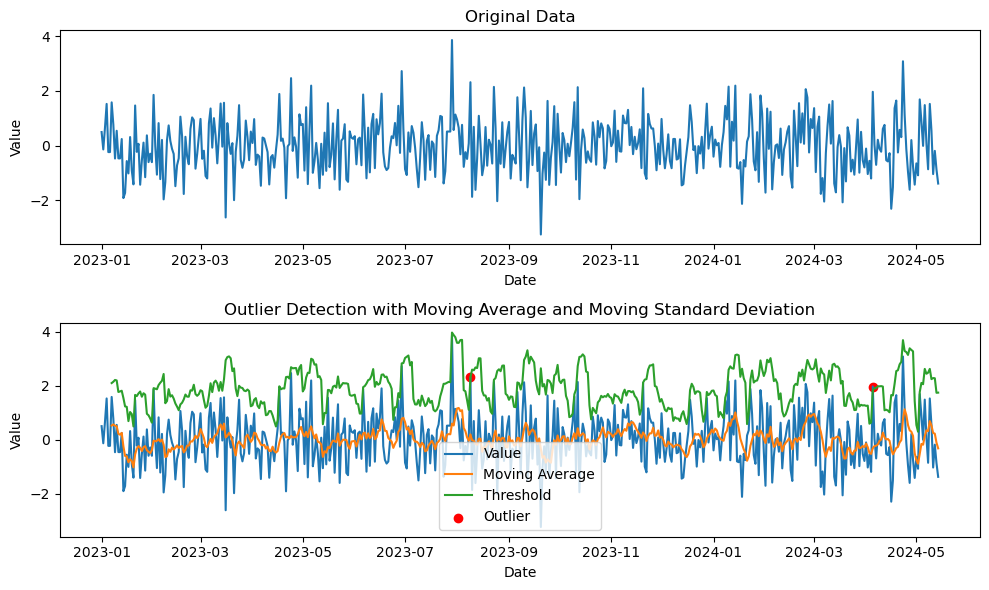

In [6]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()